<a href="https://colab.research.google.com/github/Ritankar7/EDA/blob/main/Exploratory_Data_Analysis_(EDA)_in%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Exploratory Data Analysis***

*We will inspect, explore and analyse California Housing Price dataset to derive insights from them.*

### **Importing the necessary libraries**

* Numpy - fast, versatile, flexible, vertorization, easy to use and comprehensive mathematical functions.

* Pandas - fast, powerful, flexible, high-level data analysis and manipulation tools.

* Matplotlib - data visualization library for plotting static, animated and interactive visualizations with a high level of flexibility.

* Seaborn - statistical data visualization library based on Matplotlib.

In [3]:
import numpy as np              # for mathematical operations
import pandas as pd             # data analysis
import seaborn as sns           # visualisation
import matplotlib.pyplot as plt # visualisation
# for displaying figures in notebook
%matplotlib inline 

Here, we will be using Google Colab. Uploading a dataset is pretty easy, just click on the *'Files'* icon on the taskbar on the left, then click the first icon, *'Upload to session storage'* and add the data file.

In [4]:
# to load the data as a DataFrame
housing_data = pd.read_csv('/content/housing.csv')

### **Exploring the data**

To start with exploring the data, let us first have a look at the first five rows of the dataset.

In [5]:
housing_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Similarly, the last few rows can be viewed using the `tail()` function.

In [6]:
# to view the last three rows of the dataset
housing_data.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


**About this file:**
* *longitude:* A measure of how far west a house is; a higher value is farther west

* *latitude:* A measure of how far north a house is; a higher value is farther north

* *housing_median_age:* Median age of a house within a block; a lower number is a newer building

* *total_rooms:* Total number of rooms within a block

* *total_bedrooms:* Total number of bedrooms within a block

* *population:* Total number of people residing within a block

* *households:* Total number of households, a group of people residing within a home unit, for a block

* *median_income:* Median income for households within a block of houses (measured in tens of thousands of US Dollars)

* *median_house_value:* 
Median house value for households within a block (measured in US Dollars)

* *ocean_proximity*: Location of the house w.r.t ocean/sea

To check the shape, *i.e.*, the number of rows to that of the number of columns in our dataset we use the `shape` function.

In [7]:
housing_data.shape

(20640, 10)


Thus, our data has 10 feature columns and 20640 rows. The names of the columns, or the number of rows or columns in the DataFrame can also be viewed as mentioned below.

In [8]:
# to mention the name of the columns
print('Column names: ', *housing_data.columns, sep='\n')
print()
# to count the number of columns we use the 'len' function
print("Number of columns: ", len(housing_data.columns))
# to count the number of rows
print("Number of rows: ", len(housing_data.index))

Column names: 
longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity

Number of columns:  10
Number of rows:  20640


There may be occations where an integer data is stored as a string or an object. It may also be possible that the DataFrame contains DataTime object which have been stored as a string. Thus we can check the data type of each feature using the `dtypes` function.

In [9]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

We need to check for any null or missing values in our data before doing any statistical analysis.

In [10]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

It can be seen that the *'total_bedrooms'* attribute has 207 missing values. Let's have a look at few rows with missing values.

In [11]:
# to display the first three rows with missing values
housing_data[housing_data['total_bedrooms'].isnull()].head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY


There are various method to treat missing values. Few of the most common methods are:
* delete instances with missing values
* replacing with mean, median or mode
* various data imputation methods
* using algorithms to predict missing values
* using algorithms that support missing values

Here, we will just drop the rows with missing values, as 207 missing value in 20,640 is a very small number and is thus negligible.

In [12]:
# dropping the missing values.
housing_data = housing_data.dropna() 

Pandas provides a concise method to perform the above three steps, i.e., find the shape of the DataFrame, check for missing values and display the data type of each column; and display the data summary.

In [13]:
# to print a concise summary of our data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Let's check if there are any duplicate rows in our data.

In [14]:
# to check for duplicate rows
housing_data[housing_data.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


Here, we can see that there are no duplicate rows in our data. If present, the duplicated rows add no importance and can be safely removed from the dataset using `housing_data.drop_duplicates()`.

Pandas provide has a built-in function called `describe()` which provides us a detailed summary of various statistical metrics for each column of the dataset. Alternatively, we can also use the `max()`, `min()`, `count()`, `mean()` and `median()` to find the respective statistical metrics for any column of the DataFrame.

In [15]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Here, it is pretty obvious, that *'ocean_proximity'* is a categorical feature and thus have been eliminated for statistical description by default.

### **Univariate analysis**

If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

 Let's see how many categories are there in the attribute named 'ocean_proximity' and also the number of instances in each category.

In [16]:
# returns the total number of unique outputs
housing_data['ocean_proximity'].nunique()

5

In [17]:
# returns a list of unique categories as well as the number of instances in each
housing_data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

Thereafter, let's have a look at the distribution of each feature.

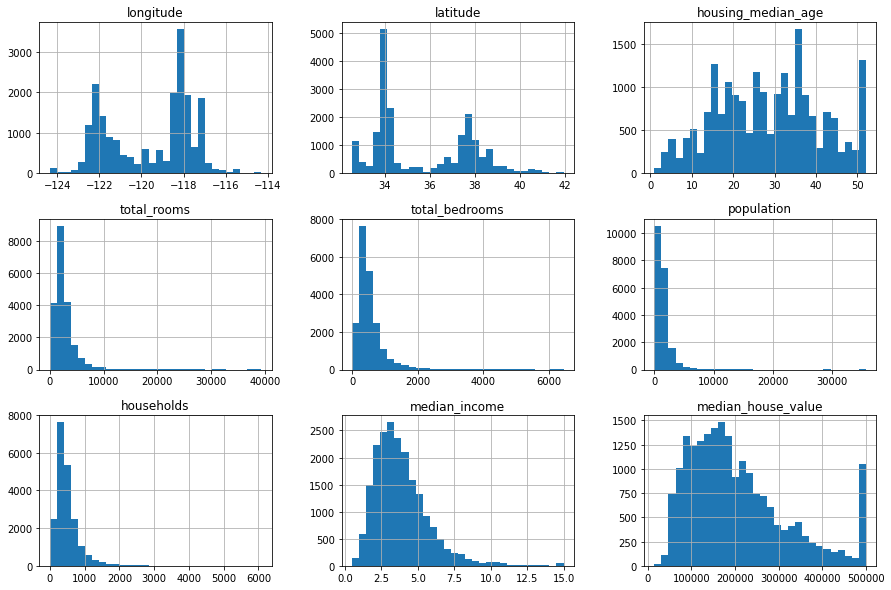

In [18]:
housing_data.hist(bins=30, figsize=(15, 10))
plt.show()

Here, we can see that most of the feature variables are skewed to the right. In addition to that, *'median_house_value'* has a maximum ceiling value set to 500000 USD, while *'housing_median_age'* has a ceiling of 50.

### **Detecting Outliers**

An outlier is a data point that differs significantly from other observations in the distribution. Sometimes they may include observations that are extremely high, low or both occuring as a result of variability in measurement, experimental error or human error. They can cause serious problems in statistical analyses by increasing data variability resulting in less accurate models. Shown below is a box plot, a method for graphically depicting groups of numerical data through their quartiles.

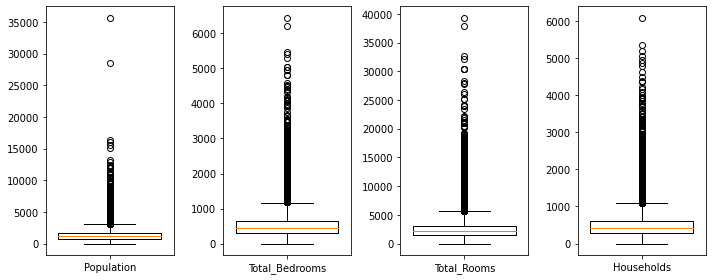

In [17]:
fig, axs = plt.subplots(ncols=4,figsize=[10,4])
axs[0].boxplot(x=housing_data['population'],labels=['Population'],widths=0.8)
axs[1].boxplot(x=housing_data['total_bedrooms'],labels=['Total_Bedrooms'],widths=0.8)
axs[2].boxplot(x=housing_data['total_rooms'],labels=['Total_Rooms'],widths=0.8)
axs[3].boxplot(x=housing_data['households'],labels=['Households'],widths=0.8)
plt.tight_layout()

Shown above are the box plot of block population, average number of rooms and average house occupancy. Here, in all the plots we can find some points that are way outside the box. If we consider the number of rooms in a block to be more than a few thousand, it can have an occupancy of 5000 or more. However, as this is sparse it can affect analysis and it is better to ignore them.

For outlier detection and removal we are going to perform the very common 1.5 x interquartile range (IQR) analysis. For more details check the Wikipedia link.

In [18]:
# calculate the first quartile for each column
Q1 = housing_data.quantile(0.25)
# calculate the third quartile for each column
Q3 = housing_data.quantile(0.75)
# find the IQR of each feature in the dataset
IQR = Q3 - Q1
# only select rows or tuples that are within 1.5 times the IQR
data = housing_data[~((housing_data < (Q1 - 1.5 * IQR)) |
                      (housing_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
print("Total samples before outlier removal: ", len(housing_data.index))
print("Total samples after outlier removal: ", len(data.index))

Total samples before outlier removal:  20433
Total samples after outlier removal:  17434


Here, we can see that out of the 20433 rows, only 17434 rows have been selected. The remaining 2999 rows have been removed as outliers using the 1.5 IQR rule.

Let's have a look at the distribution of the outlier removed data.

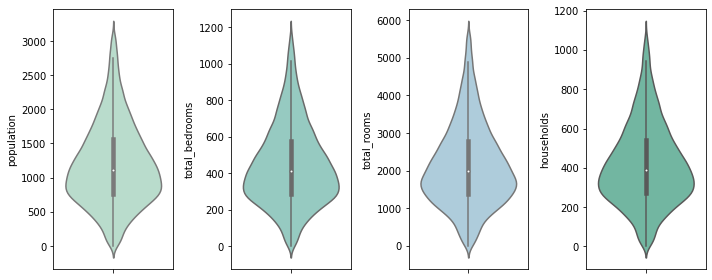

In [20]:
fig, axs = plt.subplots(ncols=4,figsize=[10,4])
sns.violinplot(y=data['population'], ax=axs[0],palette="Pastel2")
sns.violinplot(y=data['total_bedrooms'], ax=axs[1],palette="Set3")
sns.violinplot(y=data['total_rooms'], ax=axs[2],palette="Paired")
sns.violinplot(y=data['households'], ax=axs[3],palette="Set2")
plt.tight_layout()

### **Multivariate analysis**

If we analyze data by taking two or more variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Since geographical information (latitude and longitude) are provided, it is a good idea to create a scatterplot to visualize the data distribution. The dark colour indicates highly populated areas.

In [21]:
data = housing_data.copy()

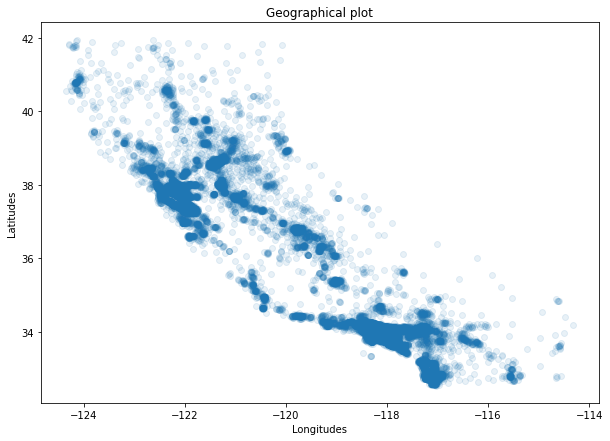

In [22]:
plt.figure(figsize=(10,7))
plt.scatter('longitude','latitude',data=data, alpha=0.1)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot')
plt.show()

It would always be better to visualize the data dispersion on the map of California itself. Here, the map of California was downloaded from 'Wikimedia'.

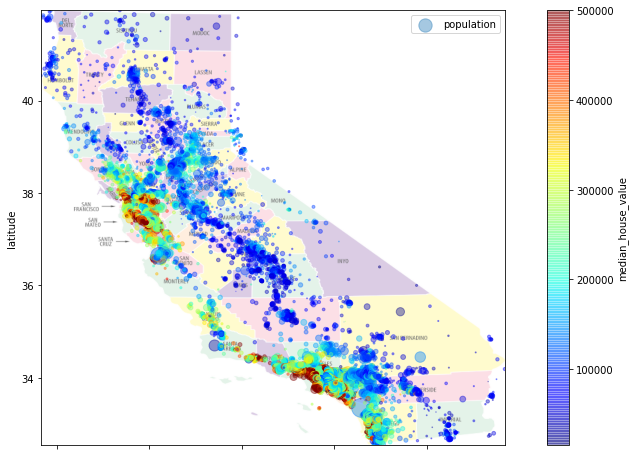

In [23]:
import matplotlib.image as mpimg
california=mpimg.imread('California_map.png')
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
# extent contains maximum and minimum geographical coordinates in the data
plt.imshow(california, extent=[-124.35, -114.30, 32.54, 41.95], alpha=0.6)

plt.legend()
plt.show()

From the figure above it is quite clear that the house price is dependent on the location (e.g. close to the ocean or major cities) and on the population density.

Now let's identify two columns 'median_income' and 'population' from our dataset and see how they are related to 'median_house_value' using scatter plots.

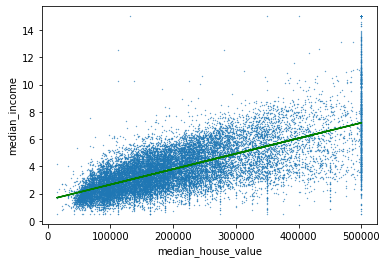

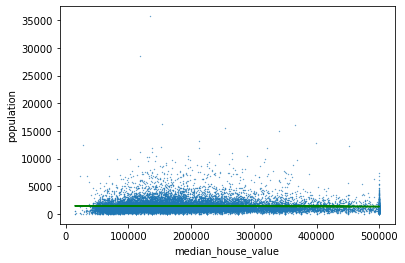

In [25]:
x = data.median_house_value
y = data.median_income
z = data.population

data.plot.scatter("median_house_value", "median_income", 0.1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x + c,'g')

data.plot.scatter("median_house_value", "population", 0.1)
m, c = np.polyfit(x, z, 1)
plt.plot(x, m*x + c, 'g')

plt.show()

Let’s plot pair plots to visualize the relationship between the feature variables.

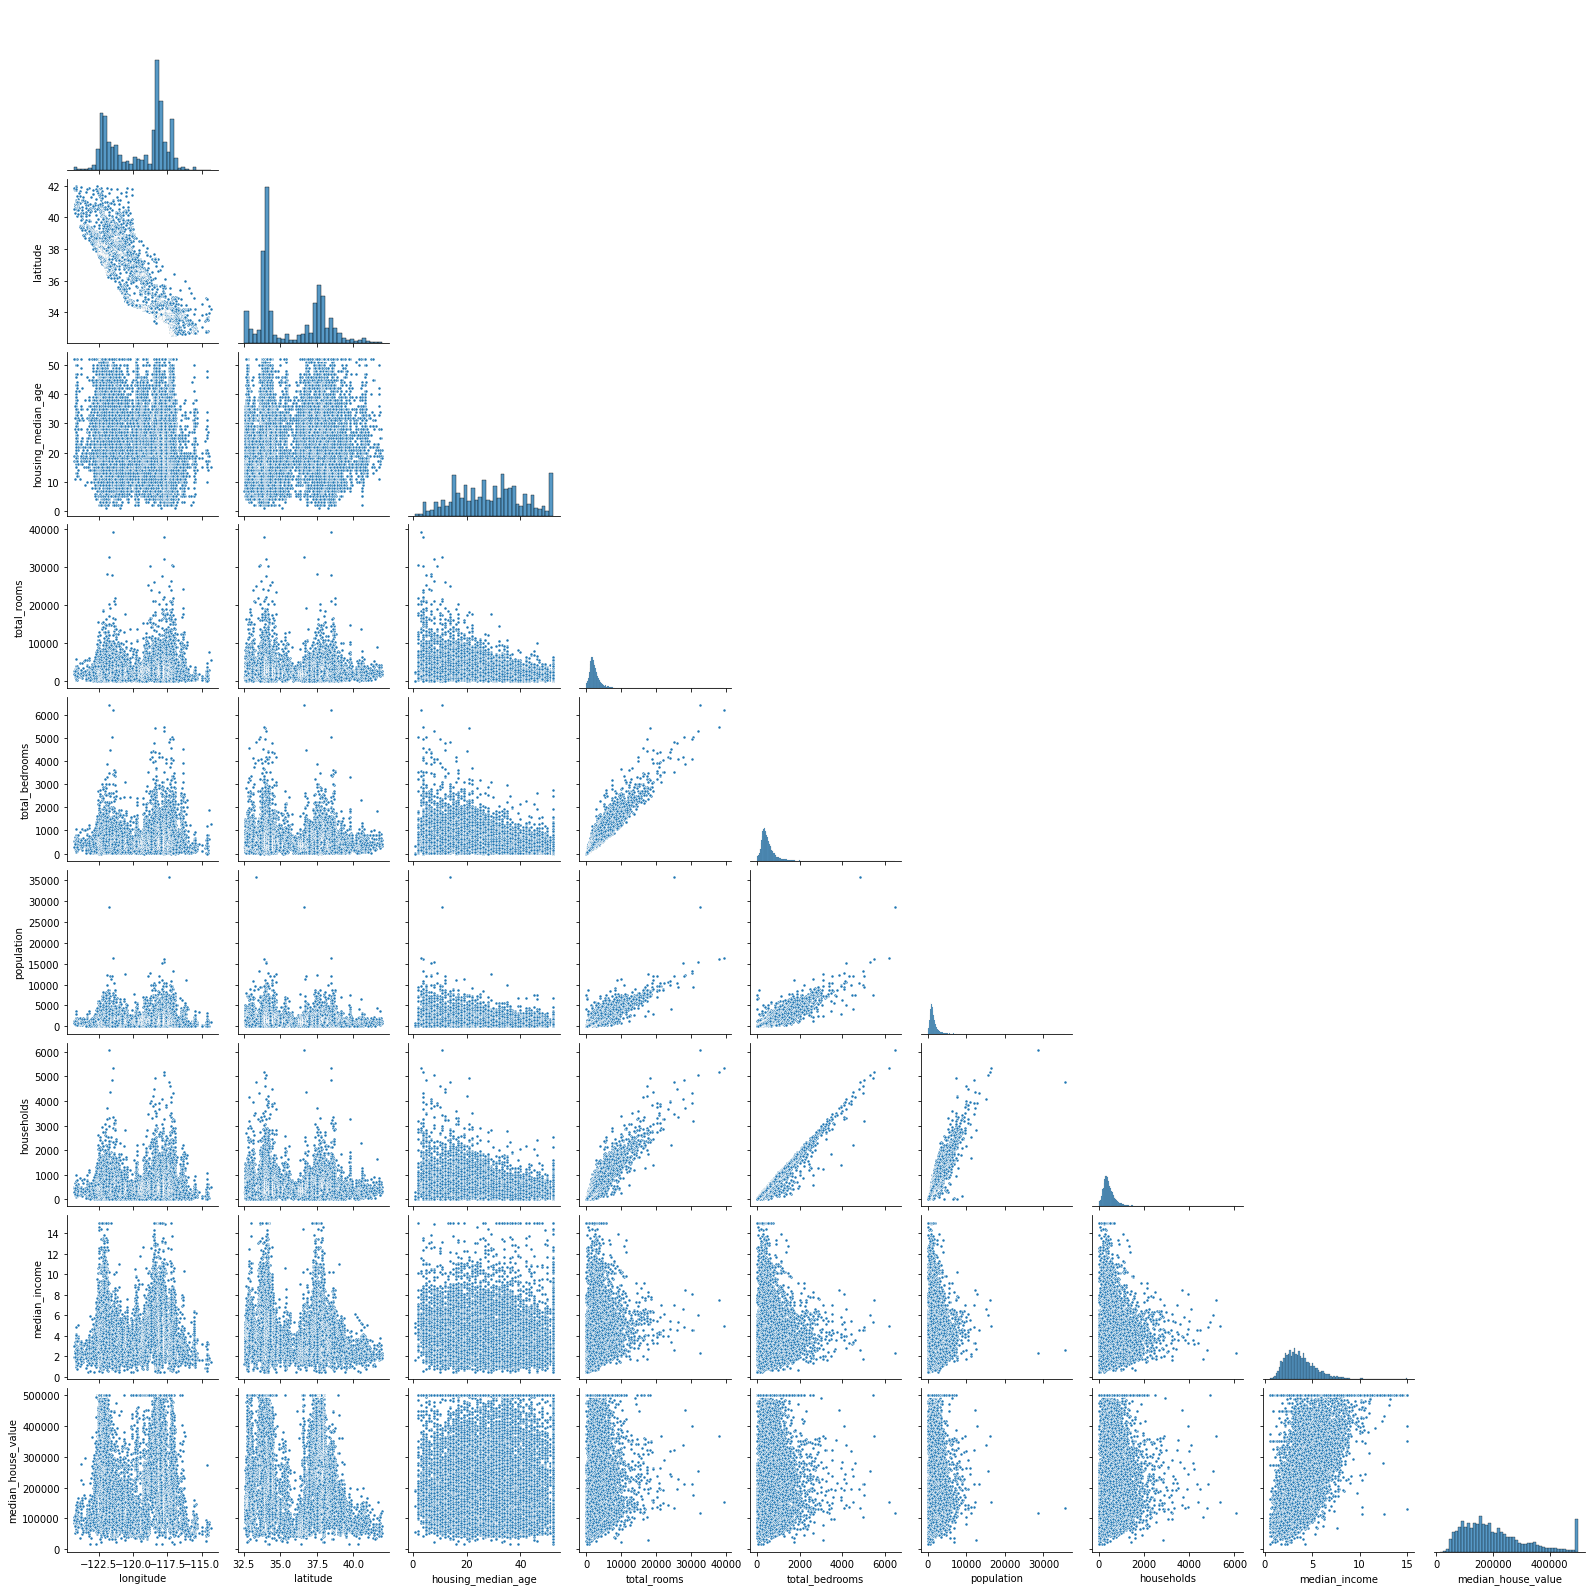

In [26]:
sns.pairplot(data, markers='.', corner=True)
plt.show()

Here, we can see that all the features have a somewhat linear relationship to one another. Thus, finding the correlation can be helpful.

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect. We will try to find which feature(s) strongly influence the house price.

In [29]:
corr_matrix = data.corr()['median_house_value'][:-1]
corr_matrix.sort_values(ascending=False)

median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

We have found the correlation of each of the attributes with that of the 'median_house_price'. However, printing a list of correlation between each pair of attributes can be quite messy. So we can try to visualize the relation between them using a heatmap.

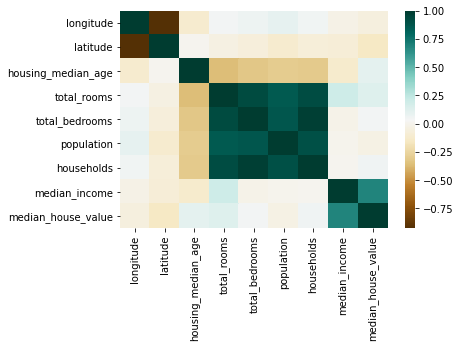

In [30]:
# plot the correlation matrix of the data
sns.heatmap(data.corr(), cmap = 'BrBG')
plt.show()

A lot of features seems to be correlated between each other. It is normal that the more the total number of households, the more will be the total number of rooms, bedrooms and the total number of people residing in it. Further, a person having higher income can afford a higher priced house.

Let's have a look at how the categorical variable, 'ocean_proximity' is dependent on the remaining numerical attributes. For this we calculate the mean value of each attribute using the ```groupby``` function.

In [37]:
data.groupby('ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household
ocean_proximity,,,,,,,,,,
<1H OCEAN,-118.864543,34.579252,30.298418,2133.273827,450.855244,1286.203509,429.701316,3.894748,218489.472285,5.015360
INLAND,-119.818786,36.830992,25.356369,2150.878288,427.997937,1125.435620,388.555613,3.098498,119414.181881,5.870529
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000,5.656577
NEAR BAY,-122.256308,37.811416,38.402122,2111.137401,442.941645,1077.629708,420.492308,3.775133,230060.000000,5.099654
NEAR OCEAN,-119.309569,34.723058,29.982759,2198.700091,475.442831,1185.547187,444.517241,3.576627,221072.459165,5.016085


Here, leaving out 'median_house_value' and 'population' there is no notable difference for most of the variable based on its location. However, to check their behaviour in more details we will plot the box plot relating 'ocean_proximity' with that of the block population, median house value for households within the block and the median income for households within the block.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


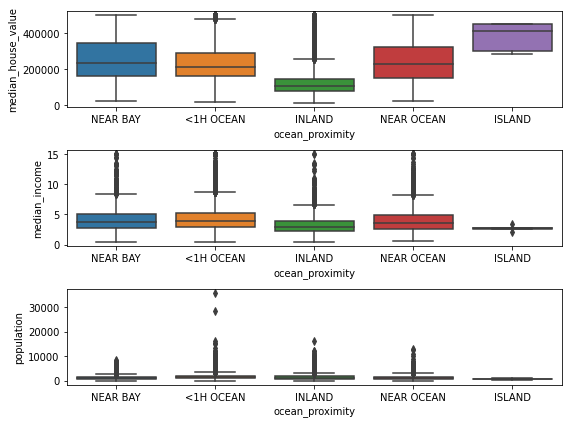

In [31]:
fig = plt.figure(figsize=(8,6))
plt.subplot(311)
sns.boxplot(data.ocean_proximity, data.median_house_value)
plt.subplot(312)
sns.boxplot(data.ocean_proximity, data.median_income)
plt.subplot(313)
sns.boxplot(data.ocean_proximity, data.population)
plt.tight_layout()

Here, we have focused on only identifying the trends in the data, and thus have ignored outlier detection, one-hot encoding of categorical variables and feature normalization that are important to train any machine learning model. We will cover these in our next topic.